In [ ]:
# Required imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Read in data as .csv file

file_loc = os.getcwd() + "/ppo_training_logs/training_log_SpaceInvaders.csv"
print(file_loc)
log_file = pd.read_csv(filepath_or_buffer= file_loc, header= None, index_col= None, names= ["Steps", "Score", "Duration"])

In [ ]:
# Have the epoch numver continually incrementing, remove the resets

addition = 0
diff = 0
for i in range(len(log_file) - 1):
    if((log_file.iloc[(i + 1),0] - log_file.iloc[i,0]) < 0):
        diff = log_file.iloc[i,0]

    log_file.iloc[i,0] += addition
    addition += diff
    diff = 0
log_file.iloc[(len(log_file) - 1),0] += addition

np_data = log_file.to_numpy()
np_data = np_data[:3000, :]

In [ ]:
chunks = np.array_split(np_data, 50)
chunked_data = np.zeros((5, len(chunks)))


for i in range(len(chunks)):
    chunked_data[:,i] = np.append(chunks[i][-1,0], np.append(np.mean(chunks[i][:,1:], 0), np.std(chunks[i][:,1:], 0)) )
chunked_data = np.transpose(chunked_data)    

In [ ]:
pd.DataFrame(chunked_data)

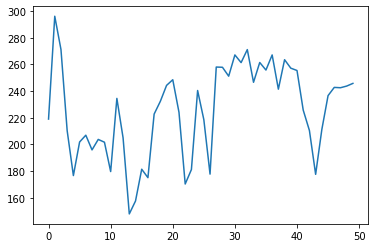

In [107]:
# Plotting the Score

#fig, ax = plt.subplots(figsize = (8,5))
#ax.errorbar(chunked_data[:,0], chunked_data[:,1], xerr=0, yerr=0, fmt='-o')
plt.plot(chunked_data[:,1])
plt.show()

In [ ]:
np_data.shape

In [ ]:
# Plotting the game duration

fig, ax = plt.subplots(figsize = (8,5))
ax.errorbar(chunked_data[:,0], chunked_data[:,2], xerr=0, yerr=chunked_data[:,4], fmt='-o')
plt.show()